In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score



In [7]:
# Load dataset
file_path = 'path_to_your_file/diabetes.csv'  # Replace with your actual file path
diabetes_data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_file/diabetes.csv'

In [8]:
# Separate features (X) and target (y)
X = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'Pedigree', 'Age']]
y = diabetes_data['Outcome']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Initialize and train the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k value as needed
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [10]:
# Calculate confusion matrix, accuracy, error rate, precision, and recall
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [11]:
# Display the results
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
 [[114  37]
 [ 35  45]]
Accuracy: 0.69
Error Rate: 0.31
Precision: 0.55
Recall: 0.56


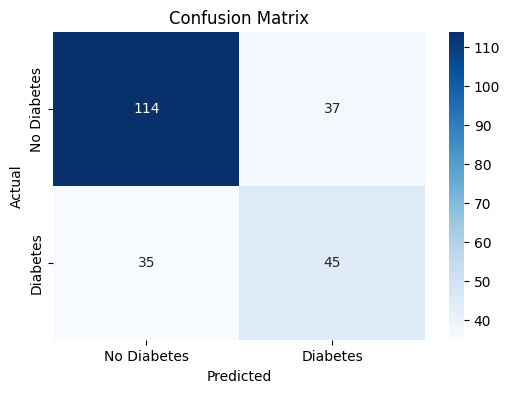

C:\Users\shivt\AppData\Local\Temp\ipykernel_15632\1848165020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


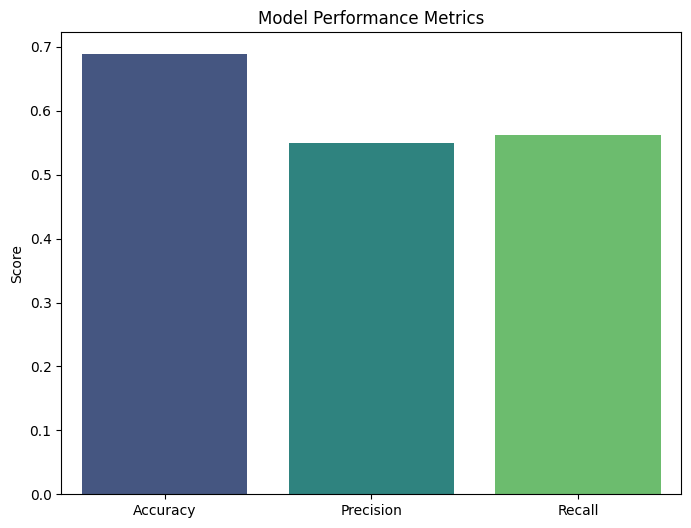

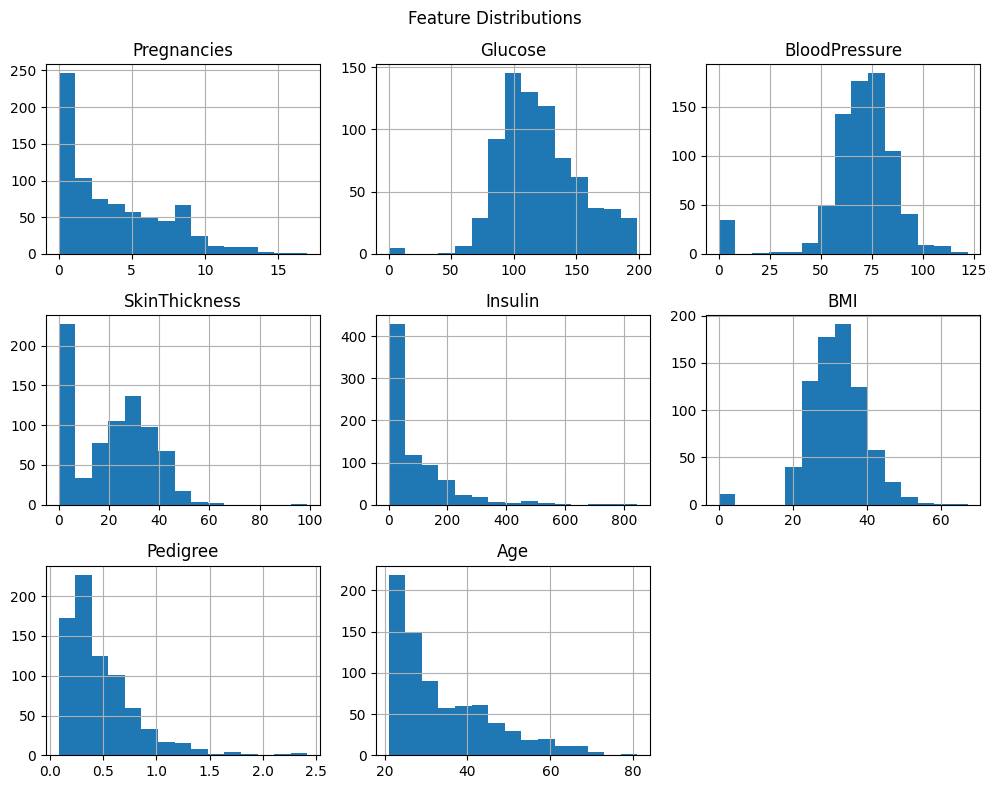

In [12]:
# Plotting

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Accuracy, Precision, Recall
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# Feature distribution histograms
diabetes_data.drop(columns='Outcome').hist(bins=15, figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()